In [ ]:
Employees Performance Case Study

In [13]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('Test_data.csv')

In [17]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


In [19]:
df.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
count,23490.000000,23490.000000,23490.000000,21678.000000,23490.000000,23490.000000,23490.000000,23490.000000
mean,39041.399149,1.254236,34.782929,3.339146,5.810387,0.358834,0.022776,63.263133
std,22640.809201,0.600910,7.679492,1.263294,4.207917,0.479668,0.149191,13.411750
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19370.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,38963.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58690.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [23]:
print(df.isnull().sum())

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64


In [25]:
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [27]:
df['previous_year_rating'].fillna(3.0, inplace=True)

In [29]:
print(df.isnull().sum())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64


In [31]:
df['no_of_trainings'] = df['no_of_trainings'].apply(lambda x: 4 if x > 4 else x)

                      employee_id  no_of_trainings       age  \
employee_id              1.000000        -0.002315  0.000920   
no_of_trainings         -0.002315         1.000000 -0.088220   
age                      0.000920        -0.088220  1.000000   
previous_year_rating    -0.005544        -0.048968  0.037746   
length_of_service        0.011781        -0.061364  0.644515   
KPIs_met >80%            0.006285        -0.040690 -0.027661   
awards_won?              0.000118         0.001478 -0.005457   
avg_training_score      -0.011735         0.050530 -0.035823   

                      previous_year_rating  length_of_service  KPIs_met >80%  \
employee_id                      -0.005544           0.011781       0.006285   
no_of_trainings                  -0.048968          -0.061364      -0.040690   
age                               0.037746           0.644515      -0.027661   
previous_year_rating              1.000000           0.027444       0.334821   
length_of_service      

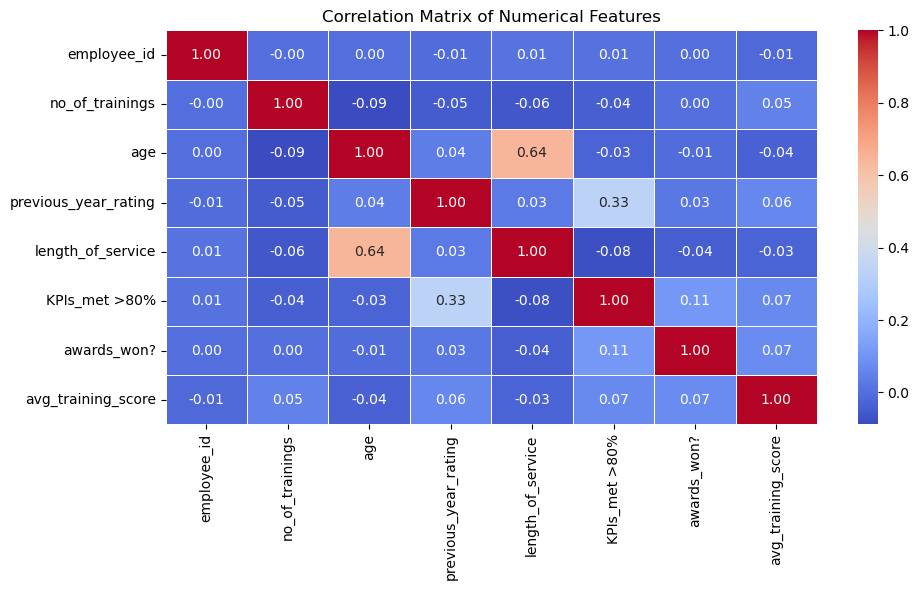

In [33]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

In [35]:
df['is_high_performer'] = (
    ((df['KPIs_met >80%'] == 1) & (df['avg_training_score'] >= 75)) |
    (df['awards_won?'] == 1)
).astype(int)

In [37]:
df['is_high_performer'].value_counts(normalize=True)

is_high_performer
0    0.884206
1    0.115794
Name: proportion, dtype: float64

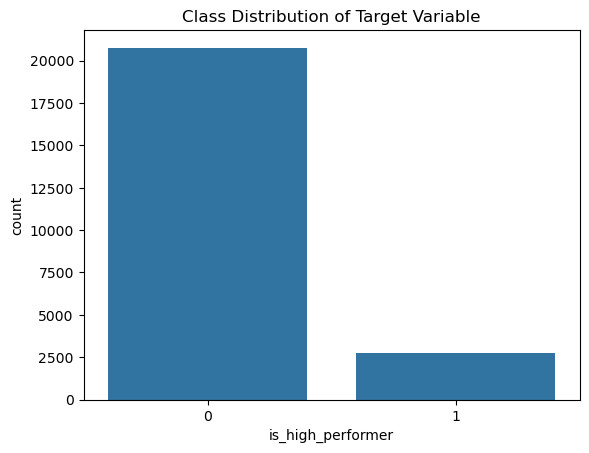

is_high_performer
0    0.884206
1    0.115794
Name: proportion, dtype: float64

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='is_high_performer', data=df)
plt.title("Class Distribution of Target Variable")
plt.show()

df['is_high_performer'].value_counts(normalize=True)

In [39]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
employee_id,23490.0,NaN,NaN,NaN,39041.399149,22640.809201,3.0,19370.25,38963.5,58690.0,78295.0
department,23490,9,Sales & Marketing,7315,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,23490,34,region_2,5299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,23490,3,Bachelor's,16612,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,23490,2,m,16596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
recruitment_channel,23490,3,other,13078,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_trainings,23490.0,NaN,NaN,NaN,1.248744,0.56422,1.0,1.0,1.0,1.0,4.0
age,23490.0,NaN,NaN,NaN,34.782929,7.679492,20.0,29.0,33.0,39.0,60.0
previous_year_rating,23490.0,NaN,NaN,NaN,3.312984,1.216959,1.0,3.0,3.0,4.0,5.0
length_of_service,23490.0,NaN,NaN,NaN,5.810387,4.207917,1.0,3.0,5.0,7.0,34.0


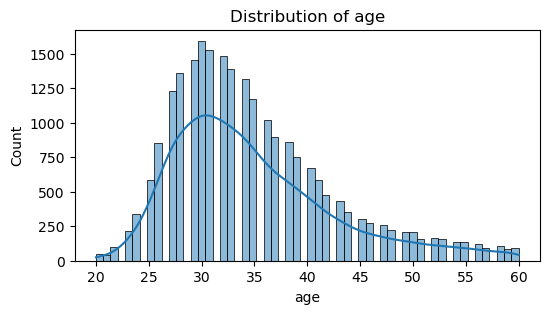

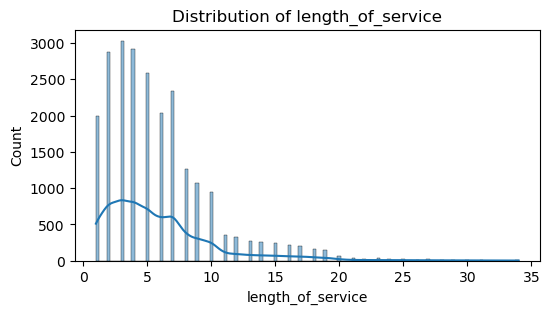

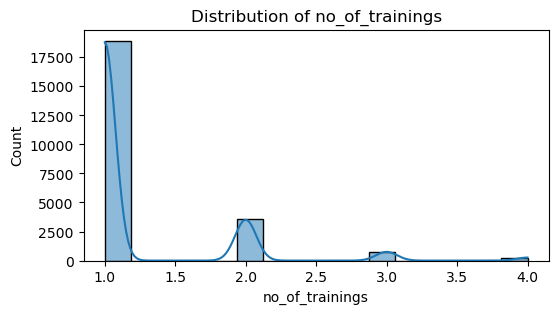

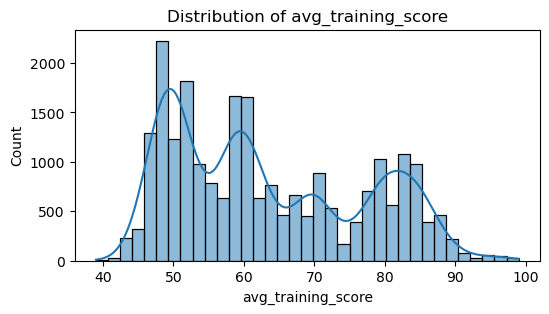

In [41]:
num_cols = ['age', 'length_of_service', 'no_of_trainings', 'avg_training_score']

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

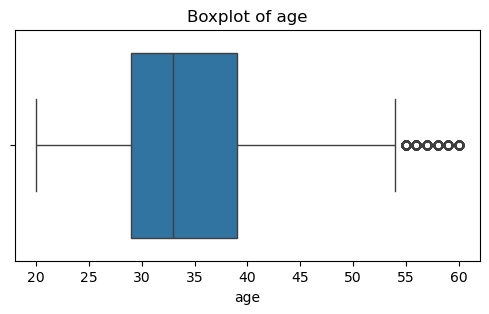

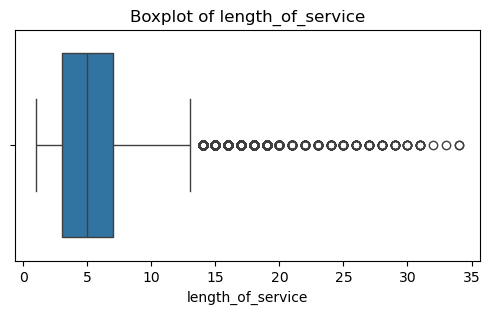

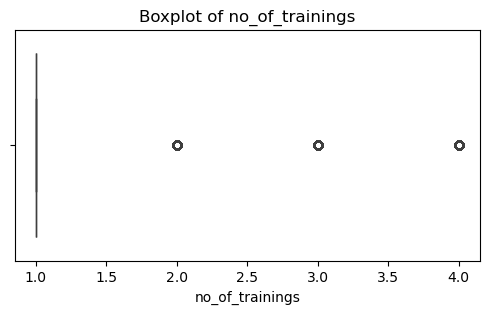

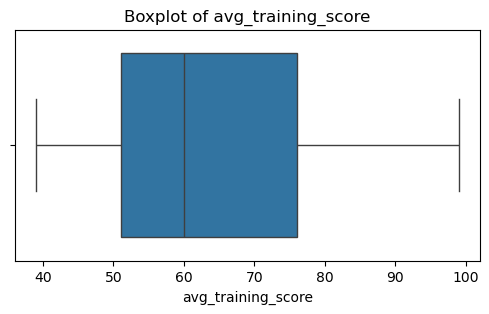

In [43]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [43]:
cat_cols = ['department', 'region', 'education', 'gender', 'recruitment_channel']

for col in cat_cols:
    print(f"\n{col}:\n", df[col].value_counts())


department:
 department
Sales & Marketing    7315
Operations           4764
Procurement          3020
Technology           3011
Analytics            2319
Finance              1091
HR                   1085
Legal                 445
R&D                   440
Name: count, dtype: int64

region:
 region
region_2     5299
region_22    2739
region_7     1982
region_13    1167
region_15    1130
region_26    1011
region_31     844
region_4      775
region_27     710
region_28     595
region_16     590
region_11     571
region_23     516
region_32     433
region_29     414
region_19     410
region_17     361
region_14     350
region_5      342
region_25     337
region_20     326
region_6      298
region_30     273
region_8      269
region_10     269
region_1      238
region_24     219
region_12     215
region_9      180
region_21     179
region_34     155
region_3      147
region_33     126
region_18      20
Name: count, dtype: int64

education:
 education
Bachelor's          16612
Master's & 

In [45]:
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

    print(f"{col} capped: min = {df[col].min()}, max = {df[col].max()}")

# Columns to cap
columns_to_cap = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']

for col in columns_to_cap:
    cap_outliers(df, col)

no_of_trainings capped: min = 1.0, max = 1.0
age capped: min = 20.0, max = 54.0
length_of_service capped: min = 1.0, max = 13.0
avg_training_score capped: min = 39.0, max = 99.0


In [47]:
education_map = {
    "Below Secondary": 0,
    "Bachelor's": 1,
    "Master's & above": 2
}
df['education'] = df['education'].map(education_map)

In [49]:
df['gender'] = df['gender'].map({'m': 1, 'f': 0})

In [51]:
df = pd.get_dummies(df, columns=['department', 'region', 'recruitment_channel'], drop_first=True)

In [53]:
df.drop('employee_id', axis=1, inplace=True)

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
def scale_data(X, scaler_type='standard'):
    scaler = None

    if scaler_type == 'standard':
        scaler = StandardScaler()
    elif scaler_type == 'minmax':
        scaler = MinMaxScaler()
    elif scaler_type == 'robust':
        scaler = RobustScaler()
    elif scaler_type == 'maxabs':
        scaler = MaxAbsScaler()
    else:
        raise ValueError("Invalid scaler type. Choose from 'standard', 'minmax', 'robust', 'maxabs'.")

    X_scaled = scaler.fit_transform(X)
    return pd.DataFrame(X_scaled, columns=X.columns)

In [57]:
X = df.drop(columns=['is_high_performer', 'avg_training_score', 'awards_won?', 'KPIs_met >80%'])
y = df['is_high_performer']

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# Use Standard Scaled data for this example (or any other scaler you prefer)
X_scaled = scale_data(X, 'standard')
model = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42)

# Define RFE to select top 20 features
rfe = RFE(estimator=model, n_features_to_select=20)

# Fit RFE
rfe.fit(X_scaled, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:\n", selected_features)

# Create a new dataset with only selected features
X_selected = X_scaled[selected_features]

Selected Features:
 Index(['age', 'previous_year_rating', 'length_of_service',
       'department_Finance', 'department_HR', 'department_Legal',
       'department_Operations', 'department_Procurement',
       'department_Sales & Marketing', 'region_region_17', 'region_region_18',
       'region_region_19', 'region_region_22', 'region_region_27',
       'region_region_29', 'region_region_3', 'region_region_31',
       'region_region_32', 'region_region_4', 'region_region_7'],
      dtype='object')


In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a DataFrame with only selected features
X_vif = pd.DataFrame(X_selected, columns=selected_features)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_vif.columns
vif_data["VIF"] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

# Sort by VIF
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data)

                         feature       VIF
0                            age  1.699279
2              length_of_service  1.657591
8   department_Sales & Marketing  1.585132
6          department_Operations  1.493407
7         department_Procurement  1.364782
3             department_Finance  1.138007
4                  department_HR  1.135330
12              region_region_22  1.075773
5               department_Legal  1.060168
19               region_region_7  1.040285
1           previous_year_rating  1.030631
9               region_region_17  1.026701
16              region_region_31  1.024193
17              region_region_32  1.021890
18               region_region_4  1.021445
13              region_region_27  1.021363
14              region_region_29  1.018032
11              region_region_19  1.017041
15               region_region_3  1.006542
10              region_region_18  1.002145


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import lightgbm as lgb
import catboost as cb

# Split the data into training and test sets (30% test size)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

# 1. XGBoost Model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluate XGBoost
print("XGBoost Accuracy: ", accuracy_score(y_test, xgb_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))

# 2. CatBoost Model
catboost_model = cb.CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
catboost_pred = catboost_model.predict(X_test)

# Evaluate CatBoost
print("CatBoost Accuracy: ", accuracy_score(y_test, catboost_pred))
print("CatBoost Classification Report:\n", classification_report(y_test, catboost_pred))

# 3. LightGBM Model
lgbm_model = lgb.LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
lgbm_pred = lgbm_model.predict(X_test)

# Evaluate LightGBM
print("LightGBM Accuracy: ", accuracy_score(y_test, lgbm_pred))
print("LightGBM Classification Report:\n", classification_report(y_test, lgbm_pred))

XGBoost Accuracy:  0.8998155243365972
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      6218
           1       0.62      0.39      0.48       829

    accuracy                           0.90      7047
   macro avg       0.77      0.68      0.71      7047
weighted avg       0.89      0.90      0.89      7047

CatBoost Accuracy:  0.8999574286930608
CatBoost Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      6218
           1       0.62      0.40      0.48       829

    accuracy                           0.90      7047
   macro avg       0.77      0.68      0.71      7047
weighted avg       0.89      0.90      0.89      7047

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1891, number of negative: 14552
[LightGBM] [Info] Auto-choosing row-wise multi-threadi

In [67]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

# 2. Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 3. Model list
models = {
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "LightGBM": LGBMClassifier(random_state=42)
}

# 4. Train & Evaluate
for name, model in models.items():
    print(f"\n{name} Model:")
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


XGBoost Model:
Accuracy: 0.8738470271037321
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.90      0.93      6231
           1       0.47      0.64      0.54       816

    accuracy                           0.87      7047
   macro avg       0.71      0.77      0.73      7047
weighted avg       0.89      0.87      0.88      7047


CatBoost Model:
Accuracy: 0.8840641407691217
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93      6231
           1       0.50      0.61      0.55       816

    accuracy                           0.88      7047
   macro avg       0.72      0.77      0.74      7047
weighted avg       0.90      0.88      0.89      7047


LightGBM Model:
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14539, number of negative: 14539
[LightGBM] [Info] Auto-choosing row-wis

Accuracy: 0.8792393926493544
F1 Score: 0.5123209169054441
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93      6231
           1       0.48      0.55      0.51       816

    accuracy                           0.88      7047
   macro avg       0.71      0.74      0.72      7047
weighted avg       0.89      0.88      0.88      7047

ROC AUC Score: 0.8399908270160896


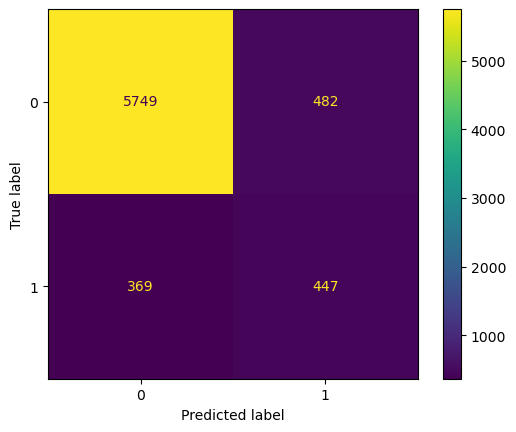

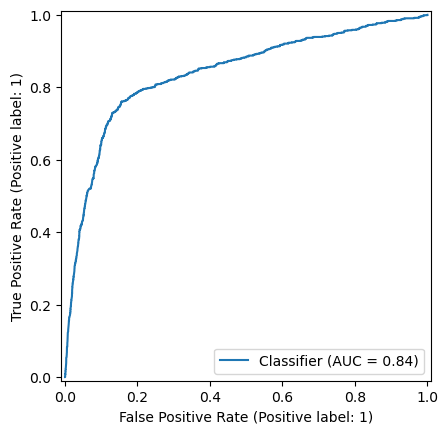

In [73]:
from sklearn.metrics import confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, f1_score

# Predict
y_pred = best_lgb_model.predict(X_test)
y_proba = best_lgb_model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba)

In [75]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    class_weight='balanced',  # or is_unbalance=True
    random_state=42
)

lgbm_model.fit(X_train_smote, y_train_smote)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14539, number of negative: 14539
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004911 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 925
[LightGBM] [Info] Number of data points in the train set: 29078, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(class_weight='balanced', random_state=42)

In [79]:
import numpy as np
from sklearn.utils.class_weight import compute_class_weight

# Convert [0, 1] to numpy array
classes = np.array([0, 1])

# Compute class weights
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_smote)

# Display class weights
class_weights_dict = dict(zip(classes, weights))
print("Class weights:", class_weights_dict)

Class weights: {0: 1.0, 1: 1.0}


In [81]:
y_proba = model.predict_proba(X_test)[:, 1]
custom_threshold = 0.6
y_pred_custom = (y_proba >= custom_threshold).astype(int)

from sklearn.metrics import precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred_custom))
print("Recall:", recall_score(y_test, y_pred_custom))
print("F1 Score:", f1_score(y_test, y_pred_custom))

Precision: 0.5198675496688742
Recall: 0.5772058823529411
F1 Score: 0.5470383275261324


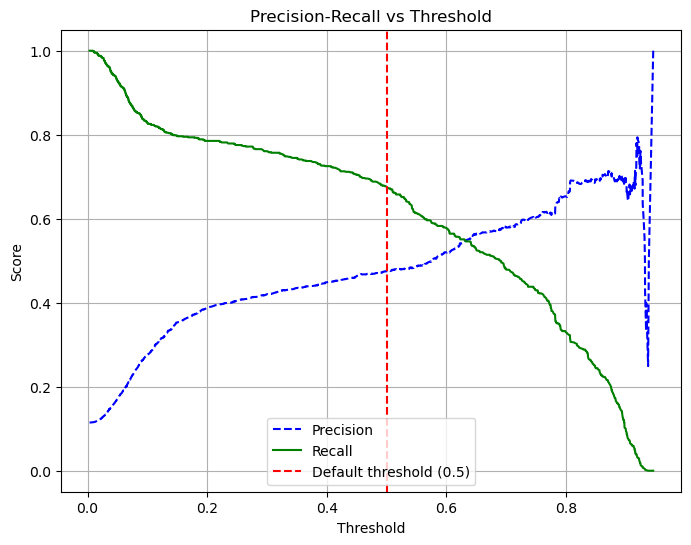

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Get predicted probabilities for the positive class
y_proba = model.predict_proba(X_test)[:, 1]

# Calculate precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Plotting precision and recall against threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.axvline(0.5, color="red", linestyle="--", label="Default threshold (0.5)")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend(loc="best")
plt.grid()
plt.show()

In [85]:
best_threshold = 0.65
y_pred_custom = (y_proba >= best_threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report at threshold =", best_threshold)
print(classification_report(y_test, y_pred_custom))

cm = confusion_matrix(y_test, y_pred_custom)
print("Confusion Matrix:\n", cm)

Classification Report at threshold = 0.65
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      6231
           1       0.56      0.52      0.54       816

    accuracy                           0.90      7047
   macro avg       0.75      0.74      0.74      7047
weighted avg       0.90      0.90      0.90      7047

Confusion Matrix:
 [[5901  330]
 [ 388  428]]
